# Import libraries

In [200]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline
from sklearn import linear_model
import math

# Import the data and explore 

In [4]:
file1 = pd.read_csv('marketing_customer_analysis.csv')
display(file1.head())
file1.shape
file1.columns

,Unnamed: 0,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,...,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,...,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN


Index(['Unnamed: 0', 'Customer', 'State', 'Customer Lifetime Value',
       'Response', 'Coverage', 'Education', 'Effective To Date',
       'EmploymentStatus', 'Gender', 'Income', 'Location Code',
       'Marital Status', 'Monthly Premium Auto', 'Months Since Last Claim',
       'Months Since Policy Inception', 'Number of Open Complaints',
       'Number of Policies', 'Policy Type', 'Policy', 'Renew Offer Type',
       'Sales Channel', 'Total Claim Amount', 'Vehicle Class', 'Vehicle Size',
       'Vehicle Type'],
      dtype='object')

In [5]:
file1.dtypesmedian_height = np.median(heights)

Unnamed: 0                         int64
Customer                          object
State                             object
Customer Lifetime Value          float64
Response                          object
Coverage                          object
Education                         object
Effective To Date                 object
EmploymentStatus                  object
Gender                            object
Income                             int64
Location Code                     object
Marital Status                    object
Monthly Premium Auto               int64
Months Since Last Claim          float64
Months Since Policy Inception      int64
Number of Open Complaints        float64
Number of Policies                 int64
Policy Type                       object
Policy                            object
Renew Offer Type                  object
Sales Channel                     object
Total Claim Amount               float64
Vehicle Class                     object
Vehicle Size    

In [7]:
file1=file1.drop(['Unnamed: 0'], axis = 1)

In [8]:
file1.columns

Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size', 'Vehicle Type'],
      dtype='object')

In [9]:
file1.dtypes

Customer                          object
State                             object
Customer Lifetime Value          float64
Response                          object
Coverage                          object
Education                         object
Effective To Date                 object
EmploymentStatus                  object
Gender                            object
Income                             int64
Location Code                     object
Marital Status                    object
Monthly Premium Auto               int64
Months Since Last Claim          float64
Months Since Policy Inception      int64
Number of Open Complaints        float64
Number of Policies                 int64
Policy Type                       object
Policy                            object
Renew Offer Type                  object
Sales Channel                     object
Total Claim Amount               float64
Vehicle Class                     object
Vehicle Size                      object
Vehicle Type    

In [10]:
file1._get_numeric_data()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,4809.216960,48029,61,7.0,52,0.0,9,292.800000
1,2228.525238,0,64,3.0,26,0.0,1,744.924331
2,14947.917300,22139,100,34.0,31,0.0,2,480.000000
3,22332.439460,49078,97,10.0,3,0.0,2,484.013411
4,9025.067525,23675,117,NaN,31,NaN,7,707.925645
...,...,...,...,...,...,...,...,...
10905,15563.369440,0,253,NaN,40,NaN,7,1214.400000
10906,5259.444853,61146,65,7.0,68,0.0,6,273.018929
10907,23893.304100,39837,201,11.0,63,0.0,2,381.306996
10908,11971.977650,64195,158,0.0,27,4.0,6,618.288849


In [11]:
file1.select_dtypes(object)

,Customer,State,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size,Vehicle Type
0,DK49336,Arizona,No,Basic,College,2/18/11,Employed,M,Suburban,Married,Corporate Auto,Corporate L3,Offer3,Agent,Four-Door Car,Medsize,NaN
1,KX64629,California,No,Basic,College,1/18/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer4,Call Center,Four-Door Car,Medsize,NaN
2,LZ68649,Washington,No,Basic,Bachelor,2/10/11,Employed,M,Suburban,Single,Personal Auto,Personal L3,Offer3,Call Center,SUV,Medsize,A
3,XL78013,Oregon,Yes,Extended,College,1/11/11,Employed,M,Suburban,Single,Corporate Auto,Corporate L3,Offer2,Branch,Four-Door Car,Medsize,A
4,QA50777,Oregon,No,Premium,Bachelor,1/17/11,Medical Leave,F,Suburban,Married,Personal Auto,Personal L2,Offer1,Branch,Four-Door Car,Medsize,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,FE99816,Nevada,No,Premium,Bachelor,1/19/11,Unemployed,F,Suburban,Married,Personal Auto,Personal L1,Offer3,Web,Luxury Car,Medsize,A
10906,KX53892,Oregon,No,Basic,College,1/6/11,Employed,F,Urban,Married,Personal Auto,Personal L3,Offer2,Branch,Four-Door Car,Medsize,A
10907,TL39050,Arizona,No,Extended,Bachelor,2/6/11,Employed,F,Rural,Married,Corporate Auto,Corporate L3,Offer1,Web,Luxury SUV,Medsize,NaN
10908,WA60547,California,No,Premium,College,2/13/11,Employed,F,Urban,Divorced,Personal Auto,Personal L1,Offer1,Branch,SUV,Medsize,A


In [14]:
file1.isna().sum()

Customer                            0
State                             631
Customer Lifetime Value             0
Response                          631
Coverage                            0
Education                           0
Effective To Date                   0
EmploymentStatus                    0
Gender                              0
Income                              0
Location Code                       0
Marital Status                      0
Monthly Premium Auto                0
Months Since Last Claim           633
Months Since Policy Inception       0
Number of Open Complaints         633
Number of Policies                  0
Policy Type                         0
Policy                              0
Renew Offer Type                    0
Sales Channel                       0
Total Claim Amount                  0
Vehicle Class                     622
Vehicle Size                      622
Vehicle Type                     5482
dtype: int64

In [19]:
file1.describe().T


,count,mean,std,min,25%,50%,75%,max
Customer Lifetime Value,10910.0,8018.241094,6885.081434,1898.007675,4014.453113,5771.147235,8992.779137,83325.381190
Income,10910.0,37536.284785,30359.195670,0.000000,0.000000,33813.500000,62250.750000,99981.000000
Monthly Premium Auto,10910.0,93.196059,34.442532,61.000000,68.000000,83.000000,109.000000,298.000000
Months Since Last Claim,10277.0,15.149071,10.080349,0.000000,6.000000,14.000000,23.000000,35.000000
Months Since Policy Inception,10910.0,48.091934,27.940675,0.000000,24.000000,48.000000,71.000000,99.000000
Number of Open Complaints,10277.0,0.384256,0.912457,0.000000,0.000000,0.000000,0.000000,5.000000
Number of Policies,10910.0,2.979193,2.399359,1.000000,1.000000,2.000000,4.000000,9.000000
Total Claim Amount,10910.0,434.888330,292.180556,0.099007,271.082527,382.564630,547.200000,2893.239678


In [24]:
nan_columns = ['State', 'Response', 'Months Since Last Claim', 'Number of Open Complaints', 'Vehicle Class', 'Vehicle Size', 'Vehicle Type']
for col in nan_columns:
    file1[col] = file1[col].fillna(file1[col].mode()[0])

In [25]:
file1.isna().sum()

Customer                         0
State                            0
Customer Lifetime Value          0
Response                         0
Coverage                         0
Education                        0
Effective To Date                0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Renew Offer Type                 0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
Vehicle Type                     0
dtype: int64

In [26]:
file1['Effective To Date'] = pd.to_datetime(file1['Effective To Date'])

In [27]:
file1.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type
0,DK49336,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,48029,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,A
1,KX64629,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,0,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,A
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,22139,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,XL78013,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,49078,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,2011-01-17,Medical Leave,F,23675,...,0.0,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,A


In [28]:
file1['Month']= pd.to_datetime(file1['Effective To Date']).dt.month

In [29]:
file1.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type,Month
0,DK49336,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,48029,...,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,A,2
1,KX64629,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,0,...,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,A,1
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,22139,...,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A,2
3,XL78013,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,49078,...,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A,1
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,2011-01-17,Medical Leave,F,23675,...,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,A,1


In [37]:
file1[(file1['Month']==1) | (file1['Month']==2)]

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type,Month
0,DK49336,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,48029,...,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,A,2
1,KX64629,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,0,...,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,A,1
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,22139,...,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A,2
3,XL78013,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,49078,...,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A,1
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,2011-01-17,Medical Leave,F,23675,...,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,A,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,2011-01-19,Unemployed,F,0,...,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A,1
10906,KX53892,Oregon,5259.444853,No,Basic,College,2011-01-06,Employed,F,61146,...,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A,1
10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2011-02-06,Employed,F,39837,...,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,A,2
10908,WA60547,California,11971.977650,No,Premium,College,2011-02-13,Employed,F,64195,...,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,A,2


# #Customer Analysis Round 3

In [39]:
file1.dtypes

Customer                                 object
State                                    object
Customer Lifetime Value                 float64
Response                                 object
Coverage                                 object
Education                                object
Effective To Date                datetime64[ns]
EmploymentStatus                         object
Gender                                   object
Income                                    int64
Location Code                            object
Marital Status                           object
Monthly Premium Auto                      int64
Months Since Last Claim                 float64
Months Since Policy Inception             int64
Number of Open Complaints               float64
Number of Policies                        int64
Policy Type                              object
Policy                                   object
Renew Offer Type                         object
Sales Channel                           

In [40]:
file1.describe().T

,count,mean,std,min,25%,50%,75%,max
Customer Lifetime Value,10910.0,8018.241094,6885.081434,1898.007675,4014.453113,5771.147235,8992.779137,83325.381190
Income,10910.0,37536.284785,30359.195670,0.000000,0.000000,33813.500000,62250.750000,99981.000000
Monthly Premium Auto,10910.0,93.196059,34.442532,61.000000,68.000000,83.000000,109.000000,298.000000
Months Since Last Claim,10910.0,14.444180,10.187488,0.000000,5.000000,13.000000,23.000000,35.000000
Months Since Policy Inception,10910.0,48.091934,27.940675,0.000000,24.000000,48.000000,71.000000,99.000000
Number of Open Complaints,10910.0,0.361962,0.890134,0.000000,0.000000,0.000000,0.000000,5.000000
Number of Policies,10910.0,2.979193,2.399359,1.000000,1.000000,2.000000,4.000000,9.000000
Total Claim Amount,10910.0,434.888330,292.180556,0.099007,271.082527,382.564630,547.200000,2893.239678
Month,10910.0,1.466728,0.498915,1.000000,1.000000,1.000000,2.000000,2.000000


In [41]:
file1['Response'].value_counts()

No     9444
Yes    1466
Name: Response, dtype: int64

In [59]:
file1['Response'] = np.where(file1.Response == 'Yes', 1, 0)


# Plot the data

<AxesSubplot:xlabel='Response', ylabel='count'>

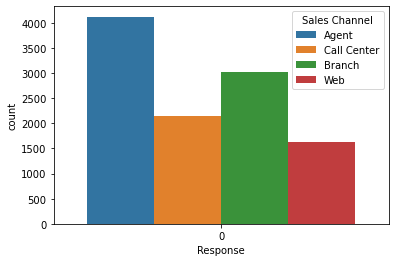

In [60]:
sns.countplot( x='Response', hue='Sales Channel', data=file1)

<AxesSubplot:xlabel='Response', ylabel='Sales Channel'>

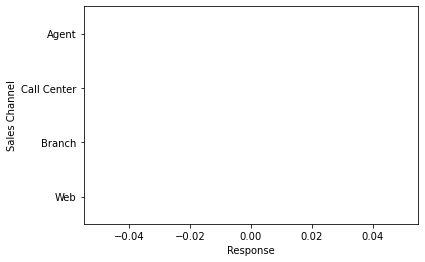

In [61]:
sns.barplot( x='Response', y='Sales Channel', data=file1)

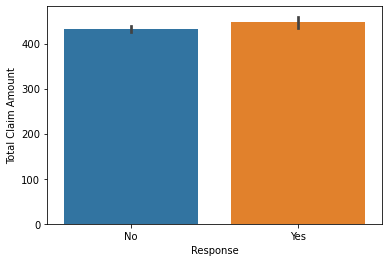

In [44]:
sns.barplot(x='Response', y ='Total Claim Amount', data = file1 )
plt.show()

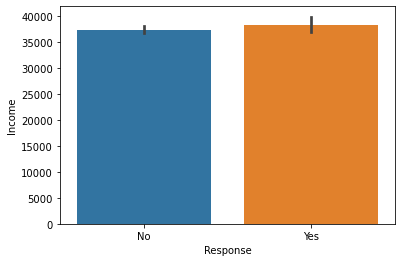

In [45]:
sns.barplot(x='Response', y ='Income', data = file1 )
plt.show()

# Round 4

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [63]:
file1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10910 entries, 0 to 10909
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Customer                       10910 non-null  object        
 1   State                          10910 non-null  object        
 2   Customer Lifetime Value        10910 non-null  float64       
 3   Response                       10910 non-null  int64         
 4   Coverage                       10910 non-null  object        
 5   Education                      10910 non-null  object        
 6   Effective To Date              10910 non-null  datetime64[ns]
 7   EmploymentStatus               10910 non-null  object        
 8   Gender                         10910 non-null  object        
 9   Income                         10910 non-null  int64         
 10  Location Code                  10910 non-null  object        
 11  Marital Status 

In [66]:
file1.describe().T

,count,mean,std,min,25%,50%,75%,max
Customer Lifetime Value,10910.0,8018.241094,6885.081434,1898.007675,4014.453113,5771.147235,8992.779137,83325.381190
Response,10910.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Income,10910.0,37536.284785,30359.195670,0.000000,0.000000,33813.500000,62250.750000,99981.000000
Monthly Premium Auto,10910.0,93.196059,34.442532,61.000000,68.000000,83.000000,109.000000,298.000000
Months Since Last Claim,10910.0,14.444180,10.187488,0.000000,5.000000,13.000000,23.000000,35.000000
Months Since Policy Inception,10910.0,48.091934,27.940675,0.000000,24.000000,48.000000,71.000000,99.000000
Number of Open Complaints,10910.0,0.361962,0.890134,0.000000,0.000000,0.000000,0.000000,5.000000
Number of Policies,10910.0,2.979193,2.399359,1.000000,1.000000,2.000000,4.000000,9.000000
Total Claim Amount,10910.0,434.888330,292.180556,0.099007,271.082527,382.564630,547.200000,2893.239678
Month,10910.0,1.466728,0.498915,1.000000,1.000000,1.000000,2.000000,2.000000


In [ ]:
file1.np.number

In [69]:
file1.select_dtypes(include=np.number)

,Customer Lifetime Value,Response,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount,Month
0,4809.216960,0,48029,61,7.0,52,0.0,9,292.800000,2
1,2228.525238,0,0,64,3.0,26,0.0,1,744.924331,1
2,14947.917300,0,22139,100,34.0,31,0.0,2,480.000000,2
3,22332.439460,0,49078,97,10.0,3,0.0,2,484.013411,1
4,9025.067525,0,23675,117,3.0,31,0.0,7,707.925645,1
...,...,...,...,...,...,...,...,...,...,...
10905,15563.369440,0,0,253,3.0,40,0.0,7,1214.400000,1
10906,5259.444853,0,61146,65,7.0,68,0.0,6,273.018929,1
10907,23893.304100,0,39837,201,11.0,63,0.0,2,381.306996,2
10908,11971.977650,0,64195,158,0.0,27,4.0,6,618.288849,2


In [70]:
file1.select_dtypes(include=np.object)

/var/folders/rj/ty5_khc929v572g5r_tjk0sw0000gn/T/ipykernel_14833/1596792718.py:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  file1.select_dtypes(include=np.object)


,Customer,State,Coverage,Education,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size,Vehicle Type
0,DK49336,Arizona,Basic,College,Employed,M,Suburban,Married,Corporate Auto,Corporate L3,Offer3,Agent,Four-Door Car,Medsize,A
1,KX64629,California,Basic,College,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer4,Call Center,Four-Door Car,Medsize,A
2,LZ68649,Washington,Basic,Bachelor,Employed,M,Suburban,Single,Personal Auto,Personal L3,Offer3,Call Center,SUV,Medsize,A
3,XL78013,Oregon,Extended,College,Employed,M,Suburban,Single,Corporate Auto,Corporate L3,Offer2,Branch,Four-Door Car,Medsize,A
4,QA50777,Oregon,Premium,Bachelor,Medical Leave,F,Suburban,Married,Personal Auto,Personal L2,Offer1,Branch,Four-Door Car,Medsize,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,FE99816,Nevada,Premium,Bachelor,Unemployed,F,Suburban,Married,Personal Auto,Personal L1,Offer3,Web,Luxury Car,Medsize,A
10906,KX53892,Oregon,Basic,College,Employed,F,Urban,Married,Personal Auto,Personal L3,Offer2,Branch,Four-Door Car,Medsize,A
10907,TL39050,Arizona,Extended,Bachelor,Employed,F,Rural,Married,Corporate Auto,Corporate L3,Offer1,Web,Luxury SUV,Medsize,A
10908,WA60547,California,Premium,College,Employed,F,Urban,Divorced,Personal Auto,Personal L1,Offer1,Branch,SUV,Medsize,A


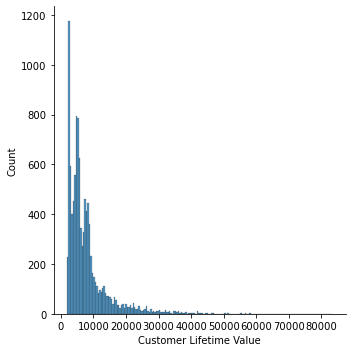

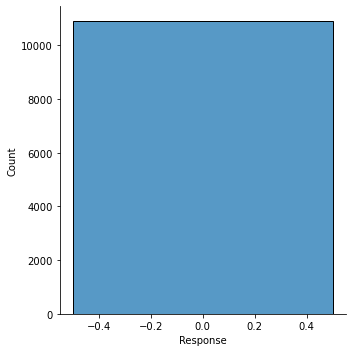

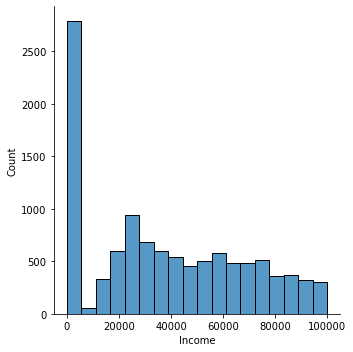

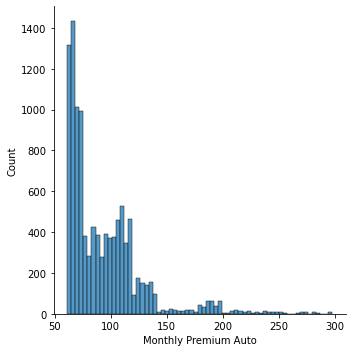

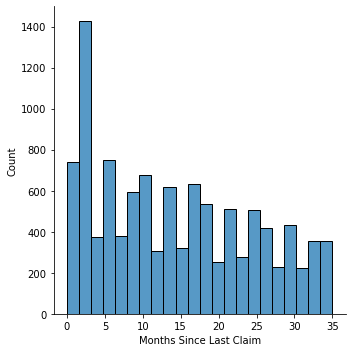

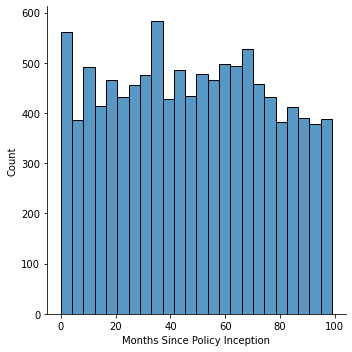

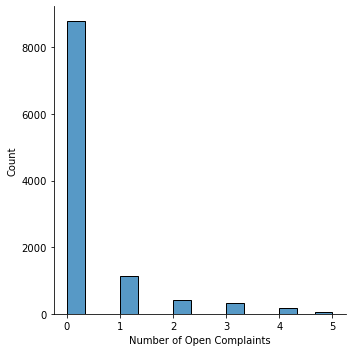

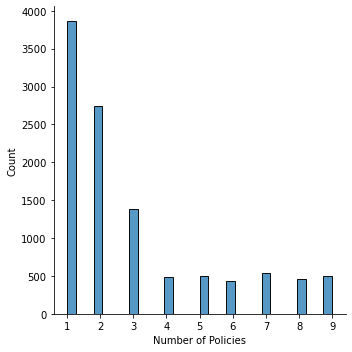

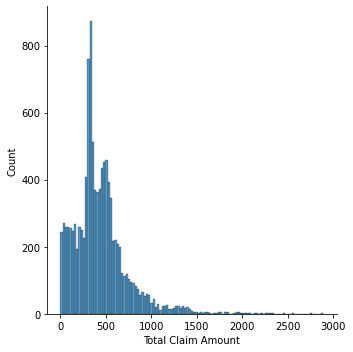

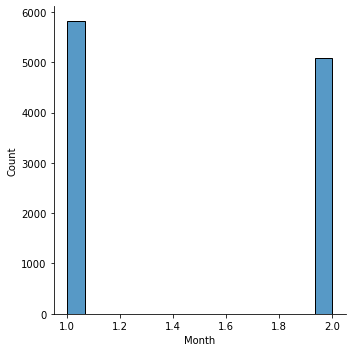

In [81]:
sns.displot(file1['Customer Lifetime Value'])
sns.displot(file1['Response'])
sns.displot(file1['Income'])
sns.displot(file1['Monthly Premium Auto'])
sns.displot(file1['Months Since Last Claim'])
sns.displot(file1['Months Since Policy Inception'])
sns.displot(file1['Number of Open Complaints'])
sns.displot(file1['Number of Policies'])
sns.displot(file1['Total Claim Amount'])
sns.displot(file1['Month'])
plt.show()




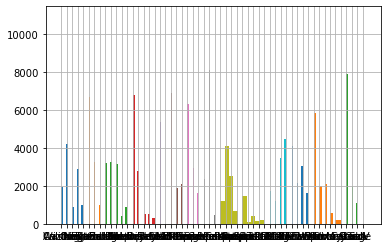

In [79]:
file1['State'].hist()
file1['Coverage'].hist()
file1['Education'].hist()
file1['EmploymentStatus'].hist()
file1['Gender'].hist()
file1['Location Code'].hist()
file1['Marital Status'].hist()
file1['Policy Type'].hist()
file1['Policy'].hist()
file1['Renew Offer Type'].hist()
file1['Sales Channel'].hist()
file1['Vehicle Class'].hist()
file1['Vehicle Size'].hist()
file1['Vehicle Type'].hist()

plt.show()

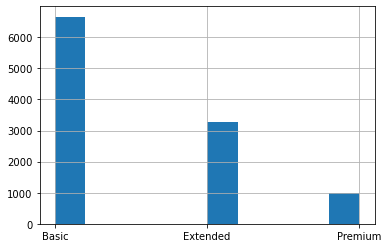

In [82]:
file1['Coverage'].hist()

#ax1, ax2, ax3 iterates through the numbers so you could put the boxplots side by side

plt.show()

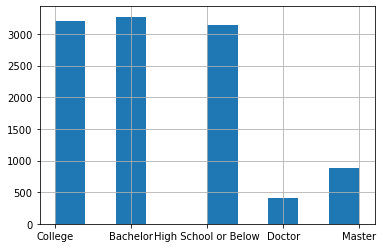

In [83]:
file1['Education'].hist()

plt.show()

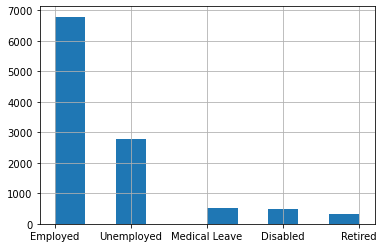

In [84]:
file1['EmploymentStatus'].hist()

plt.show()

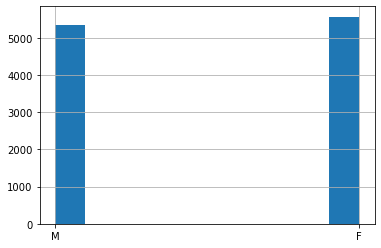

In [85]:

file1['Gender'].hist()


plt.show()

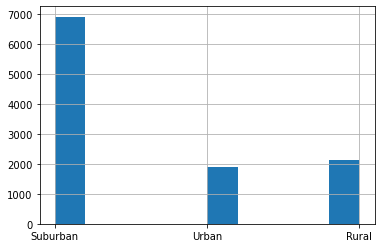

In [86]:

file1['Location Code'].hist()

plt.show()

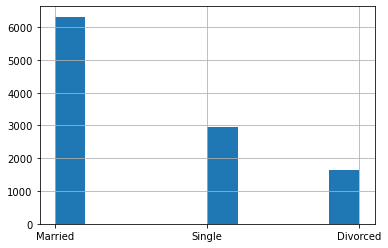

In [87]:

file1['Marital Status'].hist()

plt.show()

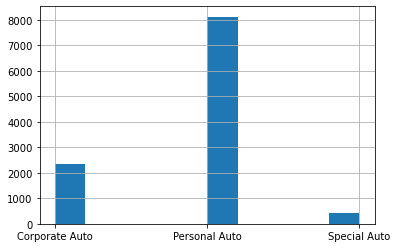

In [88]:

file1['Policy Type'].hist()

plt.show()

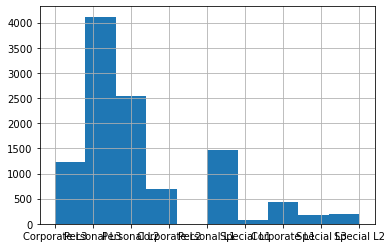

In [89]:

file1['Policy'].hist()


plt.show()

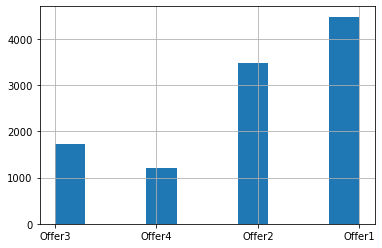

In [90]:

file1['Renew Offer Type'].hist()


plt.show()

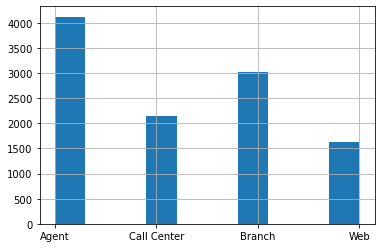

In [91]:

file1['Sales Channel'].hist()


plt.show()

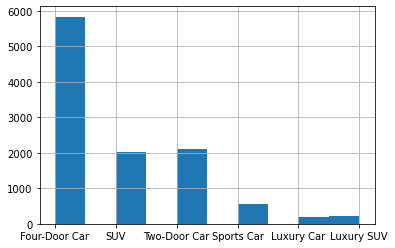

In [92]:

file1['Vehicle Class'].hist()

plt.show()

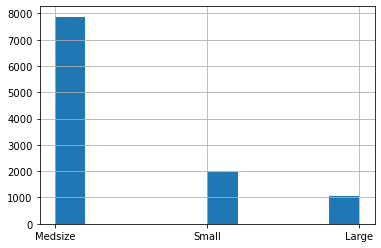

In [93]:

file1['Vehicle Size'].hist()

plt.show()

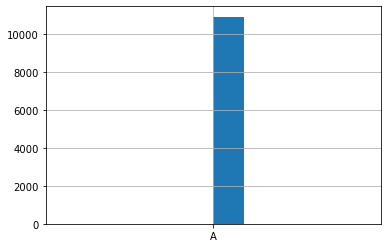

In [94]:

file1['Vehicle Type'].hist()

plt.show()

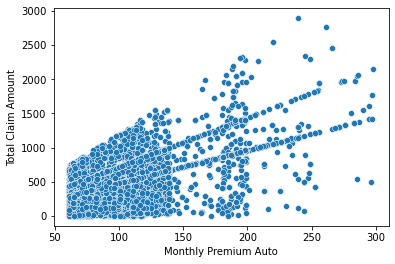

In [100]:
sns.scatterplot(x='Monthly Premium Auto',y='Total Claim Amount',data=file1)
plt.show()

In [103]:
file1['Total Claim Amount'].corr(file1['Monthly Premium Auto'])

0.6317985607757722

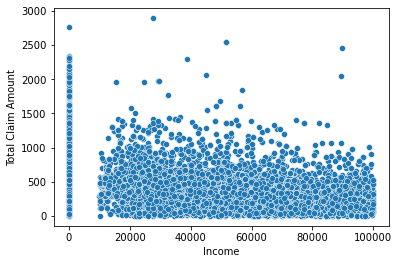

In [104]:
sns.scatterplot(x='Income',y='Total Claim Amount',data=file1)
plt.show()

In [107]:
file1['Total Claim Amount'].corr(file1['Income'])

-0.35414122250987956

In [108]:
y = file1['Total Claim Amount']
X = file1[['Monthly Premium Auto']]

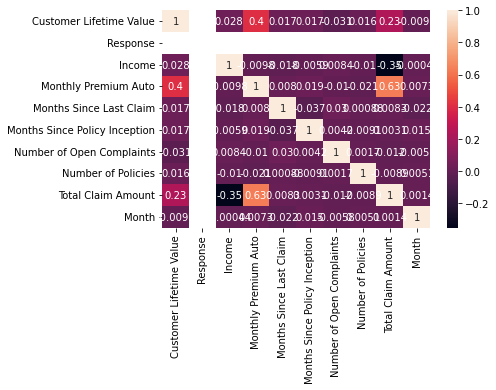

In [98]:
correlations_matrix = file1.corr()
sns.heatmap(correlations_matrix, annot=True)
plt.show()


#look at (figsize = (15,10))


# Round 5

In [110]:
file1.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type,Month
0,DK49336,Arizona,4809.216960,0,Basic,College,2011-02-18,Employed,M,48029,...,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,A,2
1,KX64629,California,2228.525238,0,Basic,College,2011-01-18,Unemployed,F,0,...,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,A,1
2,LZ68649,Washington,14947.917300,0,Basic,Bachelor,2011-02-10,Employed,M,22139,...,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A,2
3,XL78013,Oregon,22332.439460,0,Extended,College,2011-01-11,Employed,M,49078,...,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A,1
4,QA50777,Oregon,9025.067525,0,Premium,Bachelor,2011-01-17,Medical Leave,F,23675,...,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,A,1


In [166]:
X1 = file1.drop(['Total Claim Amount'], axis= 1)

In [189]:
y = file1['Total Claim Amount']

In [167]:
X1.head()

,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Renew Offer Type,Sales Channel,Month
0,Arizona,4809.216960,0,Basic,College,2011-02-18,Employed,M,48029,Suburban,Married,61,7.0,52,0.0,9,Corporate Auto,Offer3,Agent,2
1,California,2228.525238,0,Basic,College,2011-01-18,Unemployed,F,0,Suburban,Single,64,3.0,26,0.0,1,Personal Auto,Offer4,Call Center,1
2,Washington,14947.917300,0,Basic,Bachelor,2011-02-10,Employed,M,22139,Suburban,Single,100,34.0,31,0.0,2,Personal Auto,Offer3,Call Center,2
3,Oregon,22332.439460,0,Extended,College,2011-01-11,Employed,M,49078,Suburban,Single,97,10.0,3,0.0,2,Corporate Auto,Offer2,Branch,1
4,Oregon,9025.067525,0,Premium,Bachelor,2011-01-17,Medical Leave,F,23675,Suburban,Married,117,3.0,31,0.0,7,Personal Auto,Offer1,Branch,1


In [168]:
X1_num = X1.select_dtypes(include = np.number)
X1_cat = X1.select_dtypes(include = object)
X1_num.describe().T

,count,mean,std,min,25%,50%,75%,max
Customer Lifetime Value,10910.0,8018.241094,6885.081434,1898.007675,4014.453113,5771.147235,8992.779137,83325.38119
Response,10910.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
Income,10910.0,37536.284785,30359.195670,0.000000,0.000000,33813.500000,62250.750000,99981.00000
Monthly Premium Auto,10910.0,93.196059,34.442532,61.000000,68.000000,83.000000,109.000000,298.00000
Months Since Last Claim,10910.0,14.444180,10.187488,0.000000,5.000000,13.000000,23.000000,35.00000
Months Since Policy Inception,10910.0,48.091934,27.940675,0.000000,24.000000,48.000000,71.000000,99.00000
Number of Open Complaints,10910.0,0.361962,0.890134,0.000000,0.000000,0.000000,0.000000,5.00000
Number of Policies,10910.0,2.979193,2.399359,1.000000,1.000000,2.000000,4.000000,9.00000
Month,10910.0,1.466728,0.498915,1.000000,1.000000,1.000000,2.000000,2.00000


In [169]:
from sklearn.preprocessing import MinMaxScaler
MinMaxtransformer = MinMaxScaler().fit(X1_num)

X1_normalized = MinMaxtransformer.transform(X1_num)

X1_normalized = pd.DataFrame(X1_normalized,columns=X1_num.columns)

In [170]:
X1_normalized.describe().T

,count,mean,std,min,25%,50%,75%,max
Customer Lifetime Value,10910.0,0.075162,0.084555,0.0,0.025992,0.047566,0.087130,1.0
Response,10910.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0
Income,10910.0,0.375434,0.303650,0.0,0.000000,0.338199,0.622626,1.0
Monthly Premium Auto,10910.0,0.135848,0.145327,0.0,0.029536,0.092827,0.202532,1.0
Months Since Last Claim,10910.0,0.412691,0.291071,0.0,0.142857,0.371429,0.657143,1.0
Months Since Policy Inception,10910.0,0.485777,0.282229,0.0,0.242424,0.484848,0.717172,1.0
Number of Open Complaints,10910.0,0.072392,0.178027,0.0,0.000000,0.000000,0.000000,1.0
Number of Policies,10910.0,0.247399,0.299920,0.0,0.000000,0.125000,0.375000,1.0
Month,10910.0,0.466728,0.498915,0.0,0.000000,0.000000,1.000000,1.0


In [171]:
X1_cat = file1.select_dtypes(include = object)

In [172]:
X1_cat.head()

,State,Coverage,Education,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Renew Offer Type,Sales Channel
0,Arizona,Basic,College,Employed,M,Suburban,Married,Corporate Auto,Offer3,Agent
1,California,Basic,College,Unemployed,F,Suburban,Single,Personal Auto,Offer4,Call Center
2,Washington,Basic,Bachelor,Employed,M,Suburban,Single,Personal Auto,Offer3,Call Center
3,Oregon,Extended,College,Employed,M,Suburban,Single,Corporate Auto,Offer2,Branch
4,Oregon,Premium,Bachelor,Medical Leave,F,Suburban,Married,Personal Auto,Offer1,Branch


# Round 6

In [173]:
X1_cat['State'].unique()

array(['Arizona', 'California', 'Washington', 'Oregon', 'Nevada'],
      dtype=object)

In [174]:
X1_cat['Coverage' ].unique()

array(['Basic', 'Extended', 'Premium'], dtype=object)

In [175]:
X1_cat['Education' ].unique()

array(['College', 'Bachelor', 'High School or Below', 'Doctor', 'Master'],
      dtype=object)

In [176]:
X1_cat['EmploymentStatus' ].unique()

array(['Employed', 'Unemployed', 'Medical Leave', 'Disabled', 'Retired'],
      dtype=object)

In [177]:
X1_cat['Gender'].unique()

array(['M', 'F'], dtype=object)

In [178]:
X1_cat['Location Code'].unique()

array(['Suburban', 'Urban', 'Rural'], dtype=object)

In [179]:
X1_cat['Marital Status'].unique()

array(['Married', 'Single', 'Divorced'], dtype=object)

In [181]:
X1_cat['Policy Type'].unique()

array(['Corporate Auto', 'Personal Auto', 'Special Auto'], dtype=object)

In [182]:
X1_cat['Renew Offer Type'].unique()

array(['Offer3', 'Offer4', 'Offer2', 'Offer1'], dtype=object)

In [183]:
X1_cat['Sales Channel'].unique()

array(['Agent', 'Call Center', 'Branch', 'Web'], dtype=object)

In [ ]:
# deciding what columns to drop 

In [ ]:
file1 = file1.drop(['Customer','Vehicle Type', 'Vehicle Size','Vehicle Class', 'Policy' ], axis = 1)

In [156]:
file1 = file1.drop(['Customer' ], axis = 1)

In [185]:
X1_cat = file1.select_dtypes(include = object)
X1_cat.head()

,State,Coverage,Education,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Renew Offer Type,Sales Channel
0,Arizona,Basic,College,Employed,M,Suburban,Married,Corporate Auto,Offer3,Agent
1,California,Basic,College,Unemployed,F,Suburban,Single,Personal Auto,Offer4,Call Center
2,Washington,Basic,Bachelor,Employed,M,Suburban,Single,Personal Auto,Offer3,Call Center
3,Oregon,Extended,College,Employed,M,Suburban,Single,Corporate Auto,Offer2,Branch
4,Oregon,Premium,Bachelor,Medical Leave,F,Suburban,Married,Personal Auto,Offer1,Branch


In [186]:
X1_normalized.describe().T

,count,mean,std,min,25%,50%,75%,max
Customer Lifetime Value,10910.0,0.075162,0.084555,0.0,0.025992,0.047566,0.087130,1.0
Response,10910.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0
Income,10910.0,0.375434,0.303650,0.0,0.000000,0.338199,0.622626,1.0
Monthly Premium Auto,10910.0,0.135848,0.145327,0.0,0.029536,0.092827,0.202532,1.0
Months Since Last Claim,10910.0,0.412691,0.291071,0.0,0.142857,0.371429,0.657143,1.0
Months Since Policy Inception,10910.0,0.485777,0.282229,0.0,0.242424,0.484848,0.717172,1.0
Number of Open Complaints,10910.0,0.072392,0.178027,0.0,0.000000,0.000000,0.000000,1.0
Number of Policies,10910.0,0.247399,0.299920,0.0,0.000000,0.125000,0.375000,1.0
Month,10910.0,0.466728,0.498915,0.0,0.000000,0.000000,1.000000,1.0


# One-hot encoding categoricals

In [187]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(drop='first').fit(X1_cat)

print(encoder.categories_)

cols=encoder.get_feature_names(input_features=X1_cat.columns)
encoded = encoder.transform(X1_cat).toarray()
onehot_encoded = pd.DataFrame(encoded,columns=cols)


print(encoded)

[array(['Arizona', 'California', 'Nevada', 'Oregon', 'Washington'],
      dtype=object), array(['Basic', 'Extended', 'Premium'], dtype=object), array(['Bachelor', 'College', 'Doctor', 'High School or Below', 'Master'],
      dtype=object), array(['Disabled', 'Employed', 'Medical Leave', 'Retired', 'Unemployed'],
      dtype=object), array(['F', 'M'], dtype=object), array(['Rural', 'Suburban', 'Urban'], dtype=object), array(['Divorced', 'Married', 'Single'], dtype=object), array(['Corporate Auto', 'Personal Auto', 'Special Auto'], dtype=object), array(['Offer1', 'Offer2', 'Offer3', 'Offer4'], dtype=object), array(['Agent', 'Branch', 'Call Center', 'Web'], dtype=object)]
[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [1. 0. 0. ... 1. 0. 0.]
 [1. 0. 0. ... 0. 0. 1.]]


/Users/begumerdem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [206]:
X1 = pd.concat([X1_normalized, onehot_encoded], axis = 1)

In [207]:
X1.head()

,Customer Lifetime Value,Response,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Month,State_California,...,Marital Status_Married,Marital Status_Single,Policy Type_Personal Auto,Policy Type_Special Auto,Renew Offer Type_Offer2,Renew Offer Type_Offer3,Renew Offer Type_Offer4,Sales Channel_Branch,Sales Channel_Call Center,Sales Channel_Web
0,0.035752,0.0,0.480381,0.000000,0.200000,0.525253,0.0,1.000,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.004059,0.0,0.000000,0.012658,0.085714,0.262626,0.0,0.000,0.0,1.0,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,0.160264,0.0,0.221432,0.164557,0.971429,0.313131,0.0,0.125,1.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.250953,0.0,0.490873,0.151899,0.285714,0.030303,0.0,0.125,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,0.087527,0.0,0.236795,0.236287,0.085714,0.313131,0.0,0.750,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
# there is something wrong with 'Response' column but 
#I'm not sure whether I should frop it or not

In [208]:
X1.shape

(10910, 36)

In [209]:
y.head()

0    292.800000
1    744.924331
2    480.000000
3    484.013411
4    707.925645
Name: Total Claim Amount, dtype: float64

In [210]:
y.shape

(10910,)

# X-y split 

In [212]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=42)

In [213]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(8728, 36)
(2182, 36)
(8728,)
(2182,)


In [214]:
X_train.head()

,Customer Lifetime Value,Response,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Month,State_California,...,Marital Status_Married,Marital Status_Single,Policy Type_Personal Auto,Policy Type_Special Auto,Renew Offer Type_Offer2,Renew Offer Type_Offer3,Renew Offer Type_Offer4,Sales Channel_Branch,Sales Channel_Call Center,Sales Channel_Web
3105,0.033983,0.0,0.000000,0.004219,0.742857,0.626263,0.0,0.250,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
6032,0.103048,0.0,0.963553,0.278481,0.542857,0.121212,0.0,0.250,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
157,0.036541,0.0,0.188696,0.274262,0.114286,0.626263,0.0,0.000,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
6964,0.061978,0.0,0.000000,0.029536,0.685714,0.313131,0.0,0.125,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
6349,0.007055,0.0,0.638721,0.004219,0.742857,0.818182,0.0,0.000,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [215]:
y_train.head()

3105    297.600000
6032    609.600000
157     604.800000
6964    489.600000
6349    208.598246
Name: Total Claim Amount, dtype: float64

# Apply the model Linear Regression

In [218]:
lm = linear_model.LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [216]:
from sklearn.metrics import mean_absolute_error, r2_score

predictions = lm.predict(X1)
r2_score(y,predictions)

0.7687760365576478

In [219]:
predictions = lm.predict(X_train)
r2_score(y_train, predictions)

0.7688988074146378

In [220]:
predictions = lm.predict(X_test)
r2_score(y_test, predictions)

0.7672248991716454

In [217]:
predictions_test_to_predict = lm.predict(X1)
predictions_test_to_predict

array([332.21419936, 492.39651946, 632.77467418, ..., 639.57069773,
       637.61479084, 717.47584948])

In [224]:
predictions_test = lm.predict(X_test)
r2_score(y_test, predictions_test)

0.7672248991716454

In [221]:
y_test[:5]

4829    475.423848
5081    350.400000
5011    482.400000
4625    673.342650
3838    302.400000
Name: Total Claim Amount, dtype: float64

In [225]:
predictions_test[:5]

array([371.42016542, 425.46391306, 548.71494958, 586.78299248,
       316.02841236])

In [226]:
mae = mean_absolute_error(y_test, predictions_test)
print(mae)

96.18751665421914


In [228]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_test,predictions_test)
mse

rmse = math.sqrt(mse)
print(rmse)

137.09469036076652


# Bonus: build a function to clean and process the data 

In [6]:
import pandas as pd
import numpy as np

In [7]:
file1 = pd.read_csv('./marketing_customer_analysis.csv') ##Read the file into python as a data

In [20]:
def linear_regr(df):
    
    ## DATA PREPARATION 
    
    #drop the column
    df = df.drop(['Unnamed: 0'], axis=1)
    
    #Insert a space for the column names
    df = df.rename(columns={'EmploymentStatus':'Employment Status'})
    
    # make all columns lowercase and replace the spaces with underscores
    cols = []
    for i in range(len(df.columns)):
        cols.append(df.columns[i].lower().replace(' ','_'))
    df.columns = cols
    
    # drop duplicates
    df = df.drop_duplicates()
    
    # fillna
    df['response'] = df['response'].fillna('No')
    df['state'] = df['state'].fillna('Other')
    df['vehicle_type'] = df['vehicle_type'].fillna('B')
    df['vehicle_class'] = df['vehicle_class'].fillna('Four-Door Car')
    df['vehicle_size'] = df['vehicle_size'].fillna('Medsize')
    df['number_of_open_complaints'] = df['number_of_open_complaints'].fillna('0.0')
    df['months_since_last_claim'] = df['months_since_last_claim'].fillna(df['months_since_last_claim'].mean())
    
    # change the column to numeric
    df['number_of_open_complaints'] = pd.to_numeric(df['number_of_open_complaints']) 
    
    df=df.reset_index(drop=True)
    
    #change the datatype to datetime
    df['effective_to_date'] = pd.to_datetime(df['effective_to_date'])
    df['month'] = df['effective_to_date'].dt.month

    ## X-y split    
    y = df['total_claim_amount'] # lowercase y: for the target feature as it is a vector (i.e. target is almost always one column)
    X = df.drop(['total_claim_amount'], axis=1) # UPPERCASE X: In linear regression, typically one uses multiple features here (which makes a matrix)
    
    #drop the useless columns in X during splitting
    X = X.drop(['customer','effective_to_date','month'], axis=1)
    
    ## Separate the numerical and categorical columns  
    X_num = X.select_dtypes(np.number)
    X_cat = X.select_dtypes(np.object)
    
    X_num = X_num.reset_index(drop=True)
    X_cat = X_cat.reset_index(drop=True)
    
    ## Min-Max scale X_num
    from sklearn.preprocessing import MinMaxScaler
    transformer = MinMaxScaler().fit(X_num)
    X_normalized = transformer.transform(X_num)
    X_normalized=pd.DataFrame(X_normalized, columns=X_num.columns) #convert to a df
    
    ## Binning before encoding
    X_cat = X_cat.drop(['policy'], axis=1)
    X_cat.loc[df['vehicle_class'] == "Four-Door Car", 'vehicle_class'] = "Regular Car"
    X_cat.loc[df['vehicle_class'] == "Two-Door Car", 'vehicle_class'] = "Regular Car"
    X_cat.loc[df['vehicle_class'] == "Luxury SUV", 'vehicle_class'] = "Luxury Car"
    X_cat.loc[df['vehicle_class'] == "Luxury Car", 'vehicle_class'] = "Luxury Car"
    
    ## Encoding
    X_cat1= X_cat[['vehicle_size']] #to be label encoded #[[]] is needed to make it a df
    X_cat2= X_cat.drop(['vehicle_size'],axis=1) #to be one-hot encoded
    
    ## Label encode X_cat1
    from sklearn.preprocessing import LabelEncoder
    label_encoded = LabelEncoder().fit(X_cat1).transform(X_cat1) 
    label_encoded = pd.DataFrame(label_encoded,columns=X_cat1.columns)
    
    ## One-hot encode X_cat2
    from sklearn.preprocessing import OneHotEncoder
    encoder = OneHotEncoder(drop='first').fit(X_cat2)
    cols=encoder.get_feature_names(input_features=X_cat2.columns)
    encoded = encoder.transform(X_cat2).toarray()
    onehot_encoded = pd.DataFrame(encoded,columns=cols) #convert to a df
    
    ## Concatanate before model building
    X = pd.concat([X_normalized, onehot_encoded, label_encoded], axis=1) #All of the features
    
    ## Applying the model Linear Regression
    
    # Train-test split
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    
    # Linear regression
    from sklearn import linear_model
    from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
    import math
    lm = linear_model.LinearRegression()
    lm.fit(X_train,y_train)
    predictions = lm.predict(X_train)
    r2_score(y_train, predictions)
    predictions_test = lm.predict(X_test)
    r2_score(y_test, predictions_test)
    print('Actual total claim amount: ')
    print(y_test[:10])
    print('')
    print('Predicted total claim amount:')
    print(predictions_test[:10])
    
    # Validation
    mse=mean_squared_error(y_test,predictions_test)
    mae = mean_absolute_error(y_test, predictions_test)
    rmse = math.sqrt(mse)
    r2 = r2_score(y_test, predictions_test)

    print('')
    print('Linear regression model validation metrics:')
    print('Mean squared error: ', mse)
    print('Mean absolute error:', mae)
    print('Root mean squared error:', rmse)
    print('r2:', r2)
    
    

In [21]:
linear_regr(file1)

Actual total claim amount: 
1875      225.971279
7446      199.791024
8727      780.990942
10805    1137.600000
8982      511.320391
665       669.037562
1220      530.667993
722       286.234931
65        302.400000
1778      491.027024
Name: total_claim_amount, dtype: float64

Predicted total claim amount:
[175.29994852 300.85436482 723.5409351  961.80917149 569.18922837
 953.29648557 490.00276704 404.48168241 324.14583338 446.38552474]

Linear regression model validation metrics:
Mean squared error:  18788.97601854471
Mean absolute error: 94.47835966105856
Root mean squared error: 137.07288578907466
r2: 0.7749790066409902


/var/folders/rj/ty5_khc929v572g5r_tjk0sw0000gn/T/ipykernel_23903/642755579.py:47: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X_cat = X.select_dtypes(np.object)
/Users/begumerdem/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/begumerdem/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/User

In [ ]:
#Validity Metrics:

#Mean Squared Error(MSE) and Root Mean Square Error penalizes the large prediction errors.
#However, RMSE is widely used than MSE to evaluate the performance of the regression model with other random models
#as it has the same units as the dependent variable (Y-axis).

#The lower value of MAE, MSE, and RMSE implies higher accuracy of a regression model.
#However, a higher value of R square is considered desirable.

#R Squared & Adjusted R Squared are used for explaining how well the independent variables in the linear regression
#model explains the variability in the dependent variable. R Squared value always increases with the addition of
#the independent variables which might lead to the addition of the redundant variables in our model.
#However, the adjusted R-squared solves this problem.

#For comparing the accuracy among different linear regression models, RMSE is a better choice than R Squared.

#Both RMSE and R- Squared quantifies how well a linear regression model fits a dataset.
#The RMSE tells how well a regression model can predict the value of a response variable in absolute terms
#while R- Squared tells how well the predictor variables can explain the variation in the response variable.